In [2]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5c068c840c0f193ec1706e833f7c73e7c08548a0273870709893e9d44155cf46
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [3]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import(ModelSpec as MS,
                        summarize,
                        poly)
import seaborn as sns

# Simple linear regression

In [7]:
Auto = load_data('Auto')

In [8]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [10]:
y = Auto['mpg']

In [11]:
design = MS(['horsepower'])
X = design.fit_transform(Auto)

In [12]:
model = sm.OLS(y ,X)
results = model.fit()

In [13]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        08:51:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
new_df = pd.DataFrame({'horsepower' : [98]})
newX = design.transform(new_df)
newX.head()

,intercept,horsepower
0,1.0,98


In [16]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([24.46707715])

In [17]:
new_predictions.conf_int(alpha = 0.05)

array([[23.97307896, 24.96107534]])

In [18]:
new_predictions.conf_int(obs = True, alpha = 0.05)

array([[14.80939607, 34.12475823]])

- We can conclude that there is a relationship between the preditor and the response.

- R2 is 0.60 which tells us there is a medium relationship between the predictor and the response.

- There is a negatve relationship we can see that because the sign is negative giving a negative slope.

- For a value of 98 horsepower we predict a 24.46 mpg response.

- The confidence interval is [23.97307896, 24.96107534]

- The prediction interval is [14.80939607, 34.12475823]

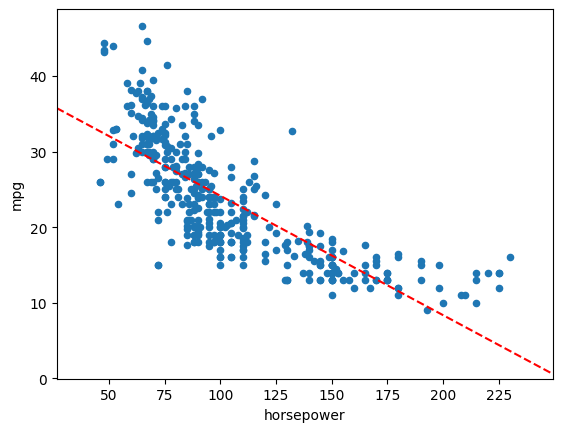

In [20]:
ax = Auto[['mpg', 'horsepower']].plot.scatter(x = 'horsepower', y = 'mpg')
pred_1 = 39.9359 + (-0.1578 * ax.get_xlim()[0])
pred_2 = 39.9359 + (-0.1578 * ax.get_xlim()[1])
ax.axline((ax.get_xlim()[0], pred_1), (ax.get_xlim()[1], pred_2), color = 'r', linestyle='--')

The relationship between the respose and the predictor seems non linear

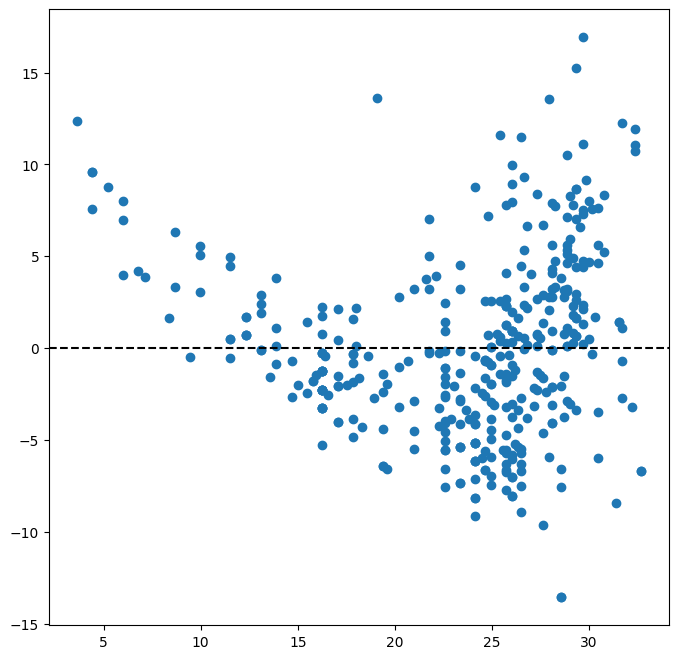

In [21]:
ax = subplots(figsize = (8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, color = 'black', linestyle = '--')

The residual plots demonstrate that the true relation between the predictor and response is not linear

In [22]:
infl = results.get_influence()

115

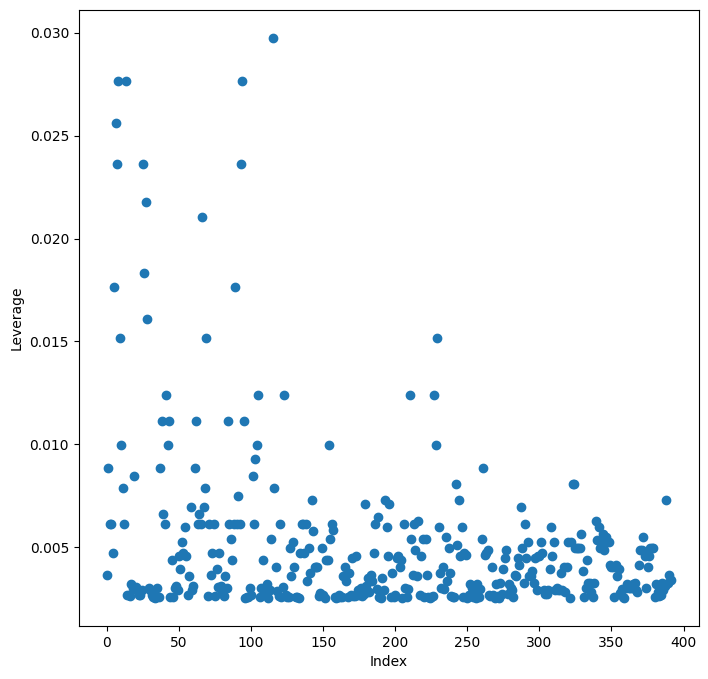

In [23]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [24]:
np.argmax(infl.hat_matrix_diag)

115

# Multiple linear regression

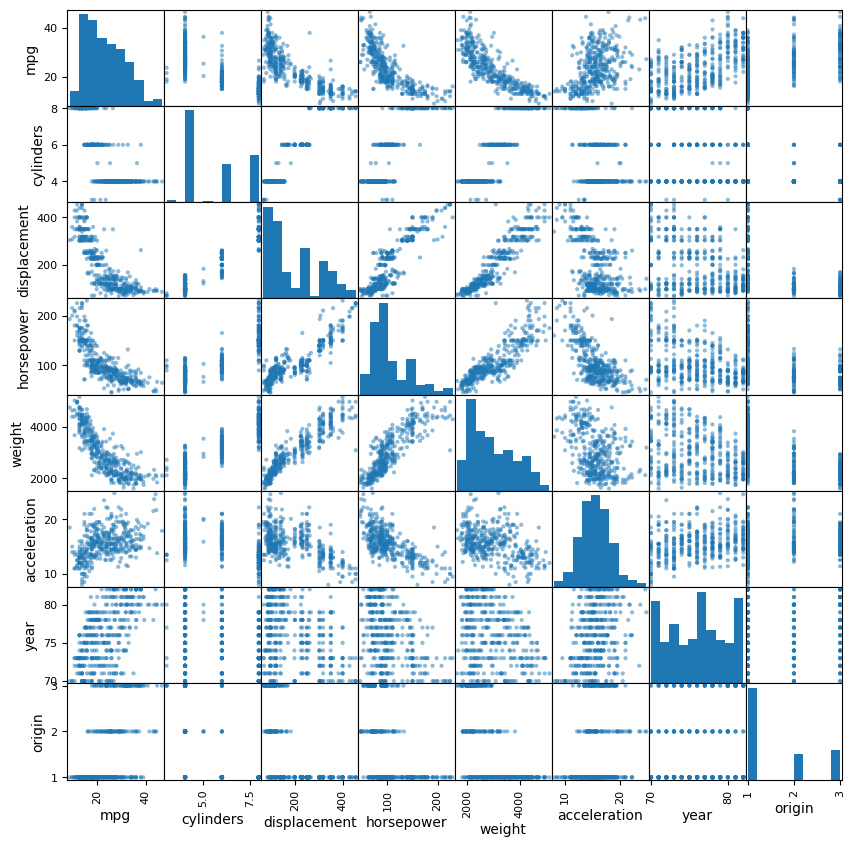

In [25]:
pd.plotting.scatter_matrix(Auto, figsize=(10, 10))
plt.show()

In [26]:
corr = Auto.corr()

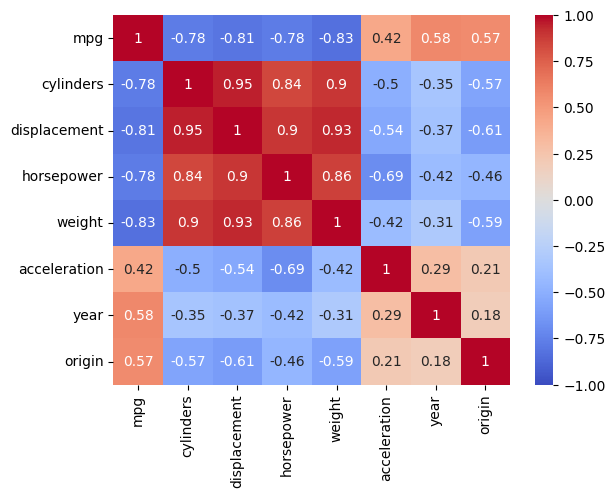

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [28]:
predictors = Auto.columns.drop('mpg')

In [29]:
design = MS(predictors)
X = design.fit_transform(Auto)

In [30]:
model = sm.OLS(y ,X)
results1 = model.fit()

In [31]:
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


- Looks like horsepower, acceleration and cylinders do not have an effect on mpg

In [32]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


By introducing more predictors we have improve our model

In [33]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        08:52:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coeff for year is 0.75, this suggests that if all other variables are held constant for each increase in year we see an improvement of 0.75 in mpg.

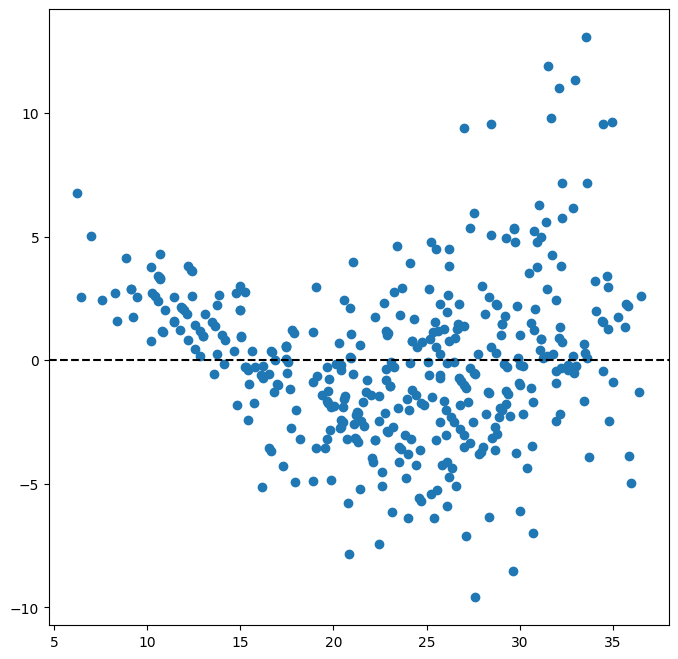

In [34]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(results1.fittedvalues, results1.resid)
ax.axhline(0, color = 'black', linestyle = '--')

The scatter plot suggest a non linear relationship between the preditors and the response

In [35]:
infl1 = results1.get_influence()

13

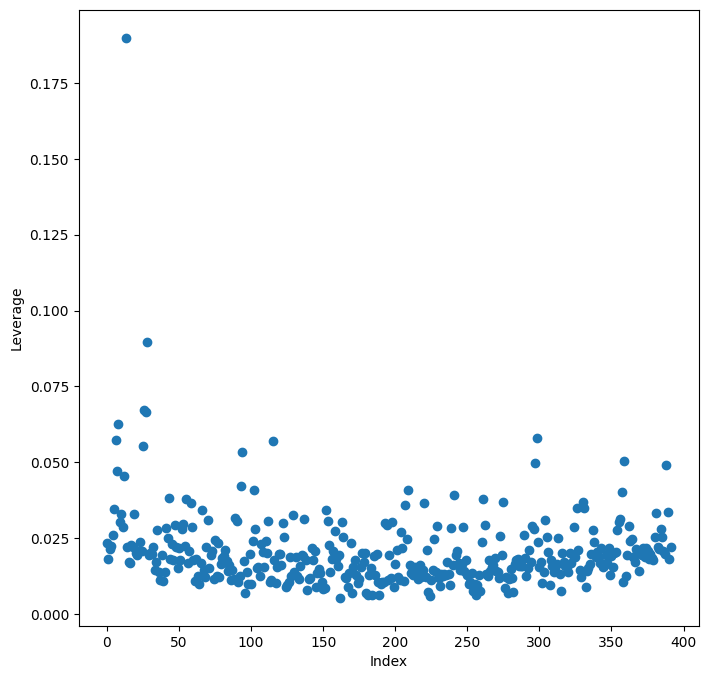

In [36]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl1.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl1.hat_matrix_diag)

# Adding interactions

In [37]:
predictors = list(predictors)

In [38]:
interactions = [('weight', 'displacement'), ('horsepower', 'displacement')  ]

In [39]:
X = MS(predictors+interactions).fit_transform(Auto)
model = sm.OLS(y, X)
results2 = model.fit()

In [40]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,-1.805500,4.273000,-0.423,0.673
cylinders,0.543200,0.303000,1.795,0.073
displacement,-0.081600,0.011000,-7.303,0.000
horsepower,-0.148000,0.028000,-5.206,0.000
weight,-0.005900,0.001000,-4.627,0.000
acceleration,-0.127600,0.096000,-1.324,0.186
year,0.755900,0.045000,16.830,0.000
origin,0.563800,0.256000,2.203,0.028
weight:displacement,0.000009,0.000004,2.494,0.013
horsepower:displacement,0.000400,0.000081,4.477,0.000


In [41]:
X = MS(predictors+interactions).fit_transform(Auto)
model = sm.OLS(y, X)
results3 = model.fit()

In [42]:
summarize(results3)

,coef,std err,t,P>|t|
intercept,-1.805500,4.273000,-0.423,0.673
cylinders,0.543200,0.303000,1.795,0.073
displacement,-0.081600,0.011000,-7.303,0.000
horsepower,-0.148000,0.028000,-5.206,0.000
weight,-0.005900,0.001000,-4.627,0.000
acceleration,-0.127600,0.096000,-1.324,0.186
year,0.755900,0.045000,16.830,0.000
origin,0.563800,0.256000,2.203,0.028
weight:displacement,0.000009,0.000004,2.494,0.013
horsepower:displacement,0.000400,0.000081,4.477,0.000


In [43]:
X = MS(predictors+interactions).fit_transform(Auto)
model = sm.OLS(y, X)
results4 = model.fit()

In [44]:
summarize(results4)

,coef,std err,t,P>|t|
intercept,-1.805500,4.273000,-0.423,0.673
cylinders,0.543200,0.303000,1.795,0.073
displacement,-0.081600,0.011000,-7.303,0.000
horsepower,-0.148000,0.028000,-5.206,0.000
weight,-0.005900,0.001000,-4.627,0.000
acceleration,-0.127600,0.096000,-1.324,0.186
year,0.755900,0.045000,16.830,0.000
origin,0.563800,0.256000,2.203,0.028
weight:displacement,0.000009,0.000004,2.494,0.013
horsepower:displacement,0.000400,0.000081,4.477,0.000


In [45]:
X = MS(predictors+interactions).fit_transform(Auto)
model = sm.OLS(y, X)
results5 = model.fit()

In [46]:
summarize(results5)

,coef,std err,t,P>|t|
intercept,-1.805500,4.273000,-0.423,0.673
cylinders,0.543200,0.303000,1.795,0.073
displacement,-0.081600,0.011000,-7.303,0.000
horsepower,-0.148000,0.028000,-5.206,0.000
weight,-0.005900,0.001000,-4.627,0.000
acceleration,-0.127600,0.096000,-1.324,0.186
year,0.755900,0.045000,16.830,0.000
origin,0.563800,0.256000,2.203,0.028
weight:displacement,0.000009,0.000004,2.494,0.013
horsepower:displacement,0.000400,0.000081,4.477,0.000


In [47]:
anova_lm(results, results1, results2 ,results3 ,results4 ,results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,102.249783,1.792151e-76
2,382.0,3196.542515,2.0,1055.670016,63.078458,2.130663e-24
3,382.0,3196.542515,-0.0,-0.000000,NaN,NaN
4,382.0,3196.542515,-0.0,-0.000000,NaN,NaN
5,382.0,3196.542515,-0.0,-0.000000,NaN,NaN


# Testing transformations

In [48]:
X = MS(predictors+interactions).fit_transform(Auto)

In [49]:
model = sm.OLS(y, np.log(X))
results6 = model.fit()

In [50]:
summarize(results6)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


,coef,std err,t,P>|t|
intercept,0.0000,0.000,NaN,NaN
cylinders,1.6093,1.687,0.954,0.341
displacement,5.4618,1.110,4.920,0.000
horsepower,-6.7453,0.954,-7.071,0.000
weight,-9.9194,1.527,-6.496,0.000
acceleration,-5.6909,1.625,-3.503,0.001
year,43.5453,1.927,22.593,0.000
origin,1.4350,0.516,2.783,0.006
weight:displacement,-4.4577,0.854,-5.217,0.000
horsepower:displacement,-1.2835,0.959,-1.338,0.182


In [51]:
model = sm.OLS(y, np.sqrt(X))
results7 = model.fit()

In [52]:
summarize(results7)

,coef,std err,t,P>|t|
intercept,-11.4250,9.459,-1.208,0.228
cylinders,0.3625,1.410,0.257,0.797
displacement,-2.9636,0.442,-6.707,0.000
horsepower,-4.6519,0.823,-5.649,0.000
weight,-0.5132,0.213,-2.412,0.016
acceleration,-1.6022,0.778,-2.058,0.040
year,13.1595,0.781,16.841,0.000
origin,1.6933,0.714,2.371,0.018
weight:displacement,0.0079,0.013,0.629,0.530
horsepower:displacement,0.2269,0.048,4.735,0.000


In [53]:
model = sm.OLS(y, np.square(X))
results8 = model.fit()

In [54]:
summarize(results8)

,coef,std err,t,P>|t|
intercept,5.934500e+00,2.110000e+00,2.813,0.005
cylinders,1.045000e-01,2.900000e-02,3.585,0.000
displacement,-1.000000e-04,2.240000e-05,-6.428,0.000
horsepower,-3.000000e-04,9.480000e-05,-2.930,0.004
weight,-1.385000e-06,1.440000e-07,-9.612,0.000
acceleration,4.400000e-03,3.000000e-03,1.624,0.105
year,5.000000e-03,0.000000e+00,16.311,0.000
origin,1.635000e-01,6.300000e-02,2.579,0.010
weight:displacement,7.902000e-12,1.020000e-12,7.768,0.000
horsepower:displacement,1.578000e-09,6.450000e-10,2.446,0.015


In [55]:
anova_lm(results5, results6, results7, results8)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,382.0,3196.542515,0.0,NaN,NaN,NaN
1,385.0,3751.926194,-3.0,-555.383680,20.037398,NaN
2,382.0,3183.368328,3.0,568.557867,20.512702,2.410354e-12
3,382.0,3529.343293,-0.0,-345.974965,inf,NaN


# Muliple linear regression Carseat data

In [56]:
Carseat = load_data('Carseats')

In [57]:
Carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [58]:
Carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [59]:
Carseat['Urban'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [60]:
Carseat['US'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [61]:
Carseat_encoded = Carseat.copy()

In [62]:
Carseat_encoded = pd.get_dummies(Carseat_encoded, columns=['Urban','US'],drop_first=True)

In [63]:
y = Carseat['Sales']

In [64]:
X = MS(['Price', 'Urban_Yes', 'US_Yes']).fit_transform(Carseat_encoded)
model = sm.OLS(y, X)
results = model.fit()

In [65]:
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban_Yes,-0.0219,0.272,-0.081,0.936
US_Yes,1.2006,0.259,4.635,0.000


In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        08:52:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- For every one unit increase in price we see a decrease on sales of 0.05
- If the carseat is urban sales decrease 0.02 vs the non urban options, but this is no significant due to the p value
- If the store is in the US then the sales increase by 1.20 vs the non manufactured US carseats

**13.04 - 0.05xPrice - 0.02xUrban_yes + 1.20xUS_yes**

US = 1 Urban = 1

13.04 - 0.05xPrice - 0.02 + 1.20

US = 1 Urban = 0

13.04 - 0.05xPrice - 0.02

US = 0 Urban = 1

13.04 - 0.05xPrice + 1.20

US = 0 Urban = 0

13.04 - 0.05xPrice

We can reject the H0 for price and US

In [67]:
X = MS(['Price', 'US_Yes']).fit_transform(Carseat_encoded)
model = sm.OLS(y, X)
results1 = model.fit()

In [68]:
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US_Yes,1.1996,0.258,4.641,0.0


In [69]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        08:52:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


Both models fit the data pretty much equally

In [71]:
results1.conf_int(alpha = 0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


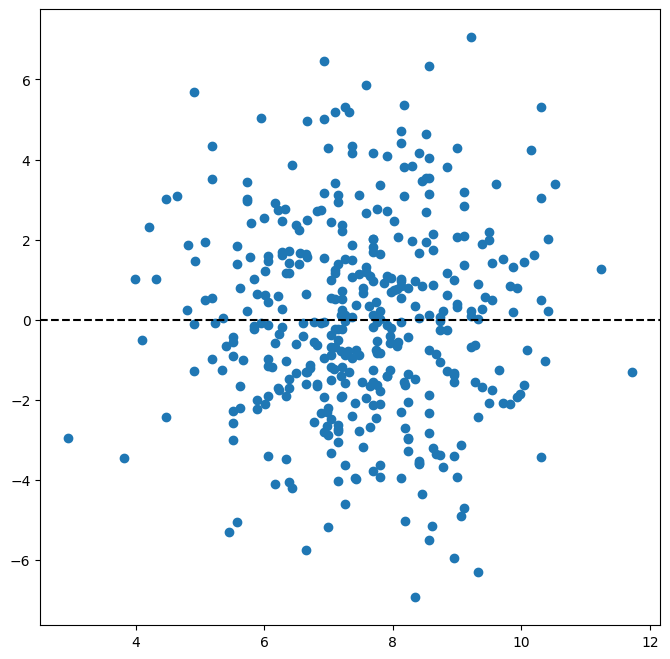

In [72]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(results1.fittedvalues, results1.resid)
ax.axhline(0, color = 'black', linestyle = '--')
plt.show()

In [73]:
infl = results1.get_influence()

42

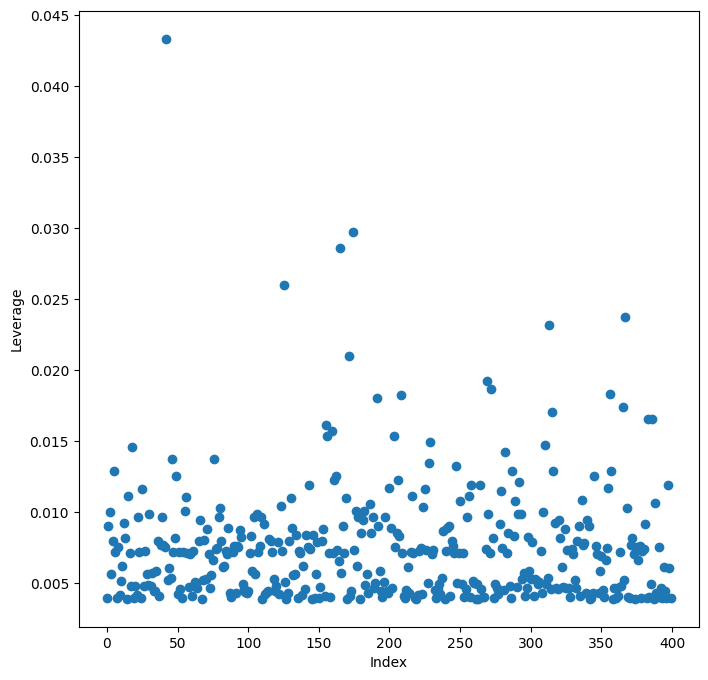

In [74]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

The residual plot does not exhibit any clear pattern, the leverage plot look also ok.

# Simple linear regression with no intercept

In [75]:
rng = np.random.default_rng(1)

In [76]:
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

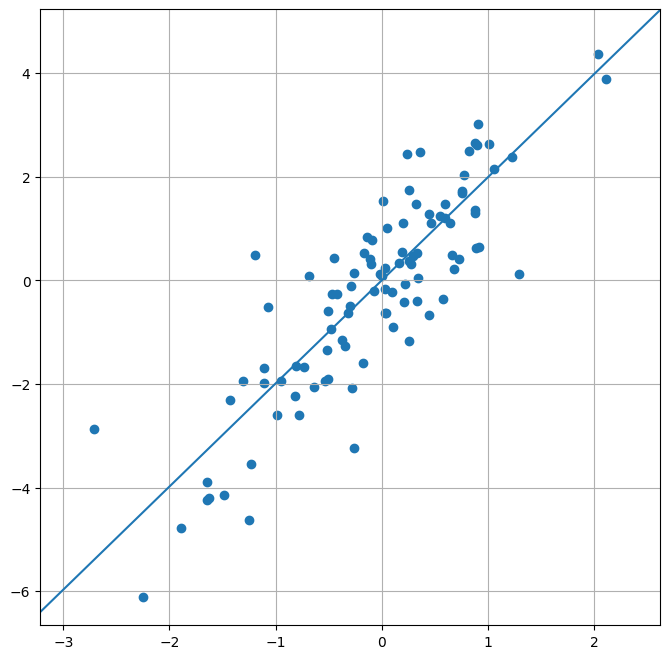

In [77]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x,y)
ax.axline((ax.get_xlim()[0], ax.get_xlim()[0] * 1.99), (ax.get_xlim()[1], ax.get_xlim()[1] * 1.99))
plt.grid(True)

In [78]:
model = sm.OLS(y, x)
results = model.fit()

In [79]:
summarize(results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


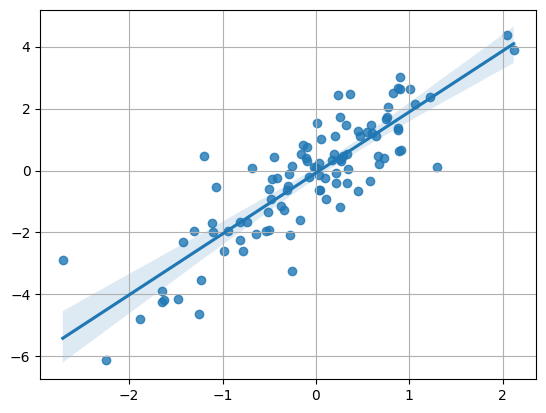

In [80]:
sns.regplot(x = x, y = y)
plt.grid(True)

Since we see a positive coeff, a low p value and a high t we can reject the H0

In [81]:
model = sm.OLS(x, y)
results = model.fit()

In [82]:
summarize(results)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


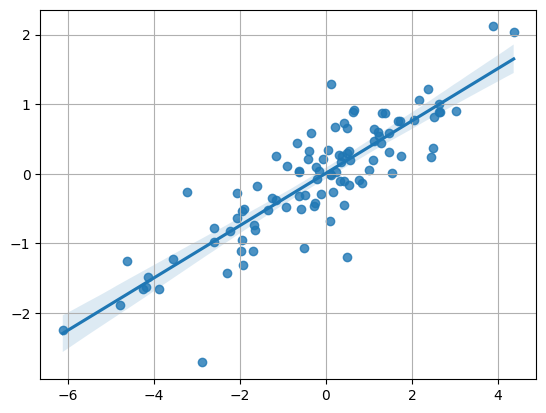

In [83]:
sns.regplot(x = y, y = x)
plt.grid(True)

In [84]:
X = pd.DataFrame({'intercept' : np.ones(len(x)),
                  'x' : x})
X.head()

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356


In [85]:
model = sm.OLS(y, X)
results = model.fit()

In [86]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [87]:
Y = pd.DataFrame({'intercept' : np.ones(len(y)),
                  'y' : y})
Y.head()

,intercept,y
0,1.0,0.039887
1,1.0,2.505681
2,1.0,0.535282
3,1.0,-1.937161
4,1.0,3.029555


In [88]:
model = sm.OLS(x, Y)
results = model.fit()

In [89]:
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


# Simple linear regresion from sample data

In [117]:
rng = np.random.default_rng(1)

In [105]:
X = rng.normal(loc = 0, scale = 1, size = 100)

In [106]:
eps = rng.normal(loc = 0, scale = 0.25, size = 100)

In [107]:
Y = -1 + (0.5 * X) + eps

In [108]:
len(Y) == len(X) == len(eps)

True

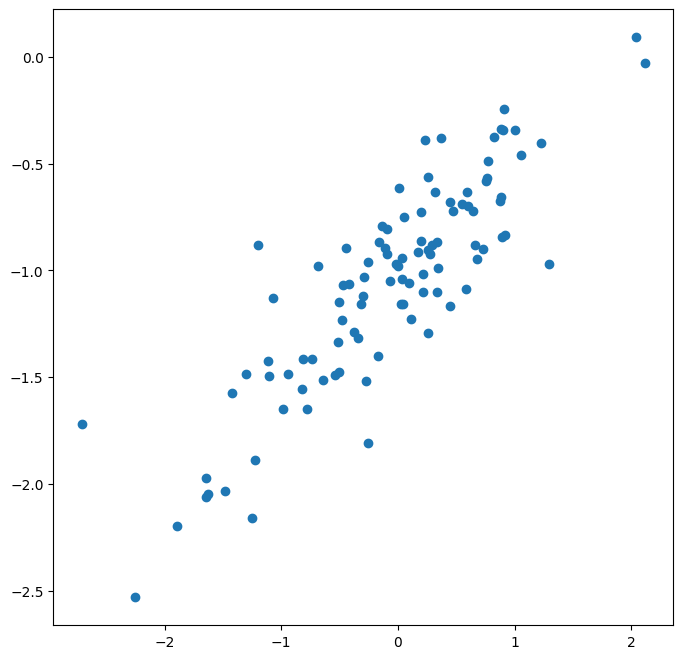

In [109]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x = X, y = Y)
plt.show()

The relationship between X and Y is linear which makes sense since me are applying a scalling factor plus a small error

In [110]:
X_df = pd.DataFrame({'intercept' : np.ones(len(X)),
                  'X' : X})

In [111]:
model = sm.OLS(Y, X_df)
results = model.fit()

In [112]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
X,0.4921,0.029,16.734,0.0


In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.74e-30
Time:                        08:55:44   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
X              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

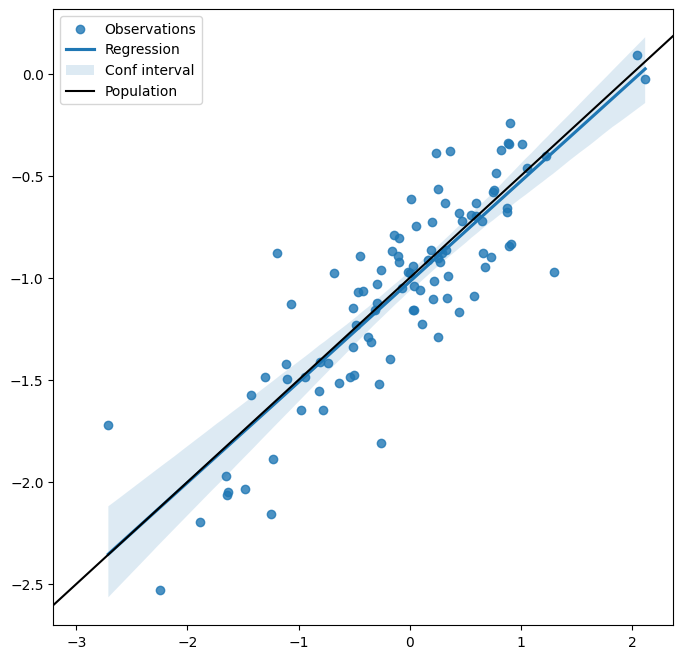

In [114]:
fig, ax = subplots(figsize = (8,8))
sns.regplot(x = X, y = Y, ax = ax)
ax.axline((ax.get_xlim()[0], -1 + 0.5 * ax.get_xlim()[0]), slope = 0.5, color = 'k')
ax.legend(['Observations', 'Regression', 'Conf interval', 'Population'])
plt.show()

# Poly regression

In [115]:
X = MS([poly('X', degree=2)]).fit_transform(X_df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.2209,0.101,-2.194,0.031
"poly(X, degree=2)[0]",16.7636,1.007,16.649,0.000
"poly(X, degree=2)[1]",-0.0522,1.007,-0.052,0.959


In [116]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           3.66e-29
Time:                        08:56:10   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.2209      0.101     -2.194      0.031      -0.421      -0.021
poly(X, degree=2)[0]    16.7636      1.007     16.649      0.000      14.765      18.762
poly(X, degree=2)[1]    -0.0522      1.007     -0.052      0.959      -2.051       1.946
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding a new variable did not improve R2 and had a low p value which makes us reject the H0 so there is no improvement of the fit.

# Reducing noise

In [118]:
rng = np.random.default_rng(1)

In [119]:
X = rng.normal(loc = 0, scale = 1, size = 100)

In [120]:
eps = rng.normal(loc = 0, scale = 0.10, size = 100)

In [121]:
Y = -1 + (0.5 * X) + eps

In [122]:
len(Y) == len(X) == len(eps)

True

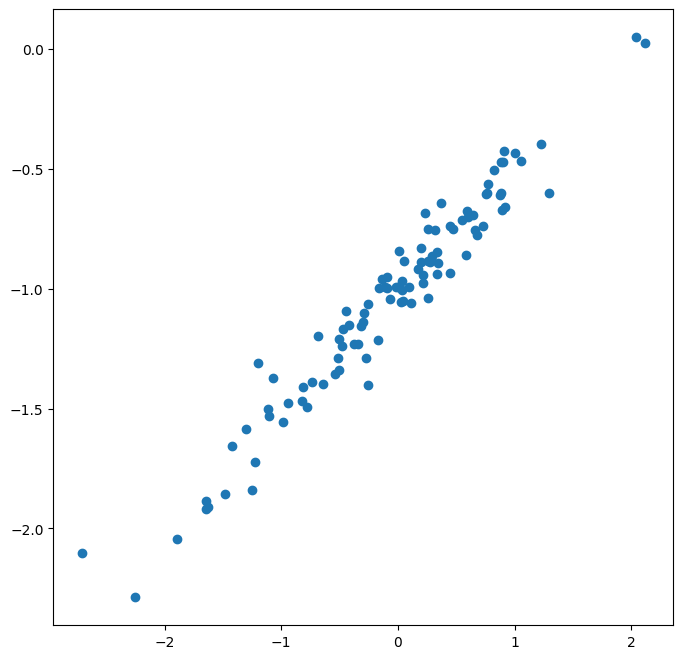

In [123]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x = X, y = Y)
plt.show()

The relationship between X and Y is linear which makes sense since me are applying a scalling factor plus a small error

In [124]:
X_df = pd.DataFrame({'intercept' : np.ones(len(X)),
                  'X' : X})

In [125]:
model = sm.OLS(Y, X_df)
results = model.fit()

In [126]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0076,0.010,-100.209,0.0
X,0.4969,0.012,42.236,0.0


In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.08e-64
Time:                        09:01:39   Log-Likelihood:                 89.198
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      98   BIC:                            -169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0076      0.010   -100.209      0.000      -1.028      -0.988
X              0.4969      0.012     42.236      0.000       0.474       0.520
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

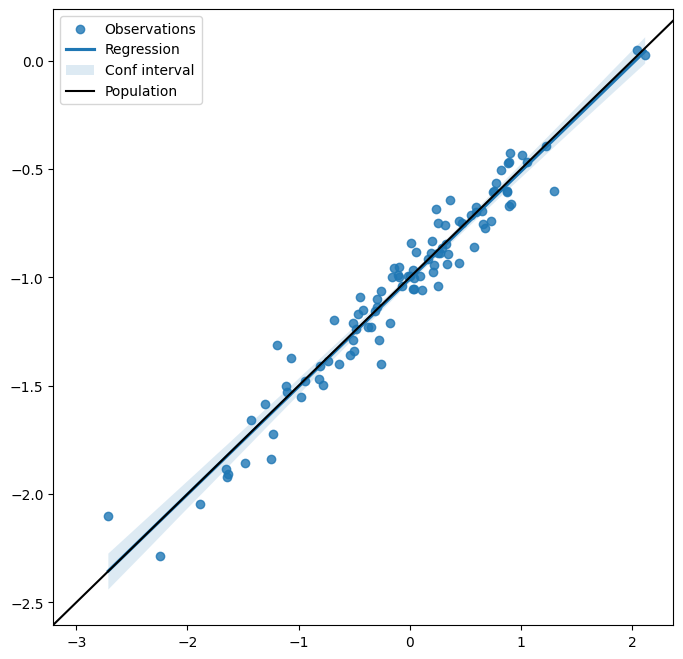

In [128]:
fig, ax = subplots(figsize = (8,8))
sns.regplot(x = X, y = Y, ax = ax)
ax.axline((ax.get_xlim()[0], -1 + 0.5 * ax.get_xlim()[0]), slope = 0.5, color = 'k')
ax.legend(['Observations', 'Regression', 'Conf interval', 'Population'])
plt.show()

With the noise of the fucntion reduce we see that all points are closer thus reducing the RSS and improving the fit of the model.

# Increasing noise

In [129]:
rng = np.random.default_rng(1)

In [130]:
X = rng.normal(loc = 0, scale = 1, size = 100)

In [131]:
eps = rng.normal(loc = 0, scale = 0.50, size = 100)

In [132]:
Y = -1 + (0.5 * X) + eps

In [133]:
len(Y) == len(X) == len(eps)

True

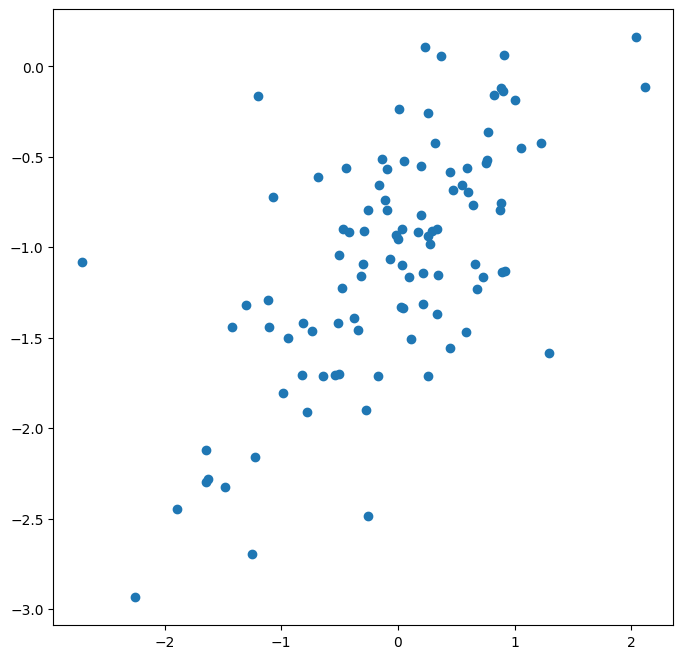

In [134]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x = X, y = Y)
plt.show()

The relationship between X and Y is linear which makes sense since me are applying a scalling factor plus a small error

In [135]:
X_df = pd.DataFrame({'intercept' : np.ones(len(X)),
                  'X' : X})

In [136]:
model = sm.OLS(Y, X_df)
results = model.fit()

In [137]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
X,0.4843,0.059,8.233,0.0


In [138]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           8.04e-13
Time:                        09:03:59   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0380      0.050    -20.647      0.000      -1.138      -0.938
X              0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

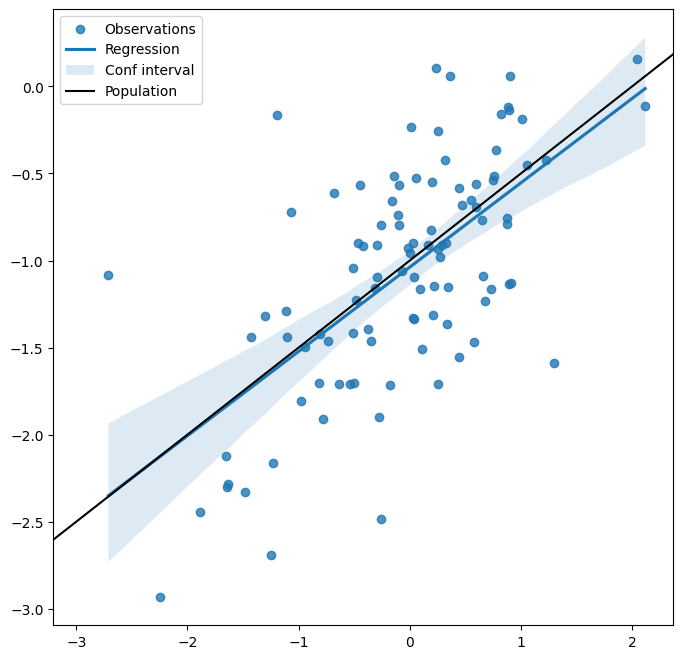

In [139]:
fig, ax = subplots(figsize = (8,8))
sns.regplot(x = X, y = Y, ax = ax)
ax.axline((ax.get_xlim()[0], -1 + 0.5 * ax.get_xlim()[0]), slope = 0.5, color = 'k')
ax.legend(['Observations', 'Regression', 'Conf interval', 'Population'])
plt.show()

As expected with more noise the R2 has decrease meaning we have a worse fit vs the original function.

But the significance of the predictors still holds.

Comparing the 3 models we see visualy that the confidence intervals got better or worse depending on how much noise there is.

# Collinearity

In [160]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

For this model we have a intercept on 2 a first coeff of 2 and a second coeff of 0.3 and the error term.

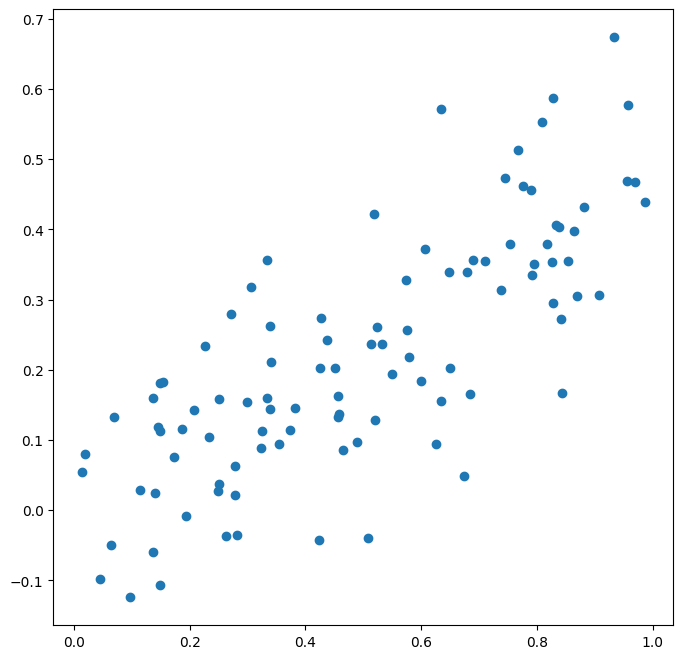

In [161]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x = x1, y = x2)
plt.show()

There is a clear linear relationship between x1 and x2

In [162]:
X_df = pd.DataFrame({'intercept' : np.ones(len(x1)),
                     'X1' : x1,
                     'X2' : x2})

In [163]:
model = sm.OLS(y, X_df)
results = model.fit()

In [164]:
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
X1,1.6154,0.527,3.065,0.003
X2,0.9428,0.831,1.134,0.259


The coeff for the regresions are 1.95, 1.61, 0.94. On the intercept we are pretty close but on the other 2 we are not

We can reject the H0 for X1 but not for X2

In [165]:
model = sm.OLS(y, X_df['X1'])
results1 = model.fit()

In [166]:
summarize(results1)

,coef,std err,t,P>|t|
X1,5.0887,0.231,22.075,0.0


In [167]:
model = sm.OLS(y, X_df['X2'])
results2 = model.fit()

In [168]:
summarize(results2)

,coef,std err,t,P>|t|
X2,9.4697,0.615,15.406,0.0


If we look at each predictor individually we notice that we can reject H0 for them, this makes sense as X2 is a funtion of X1, but when looking at them together it is clear that a relation exist and that X2 is driven by X1

In [169]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

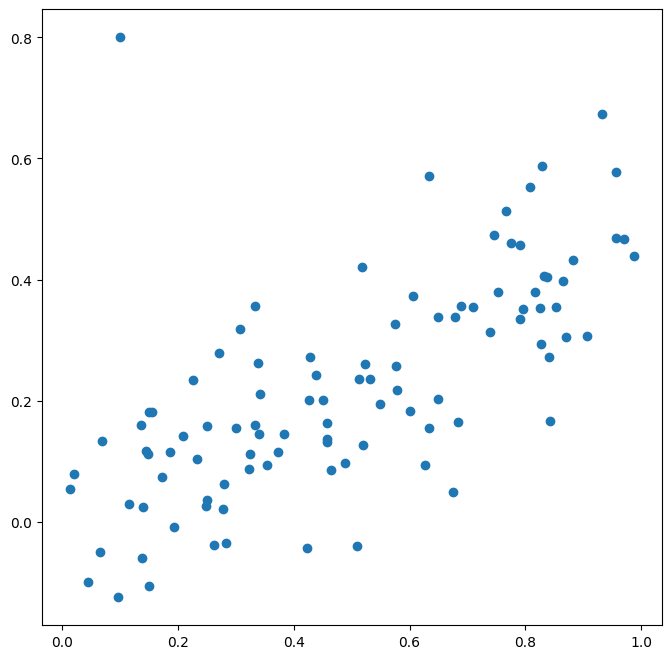

In [170]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x = x1, y = x2)
plt.show()

In [171]:
X_df = pd.DataFrame({'intercept' : np.ones(len(x1)),
                     'X1' : x1,
                     'X2' : x2})

In [172]:
model = sm.OLS(y, X_df)
results = model.fit()

In [173]:
summarize(results)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
X1,0.8575,0.466,1.838,0.069
X2,2.2663,0.705,3.216,0.002


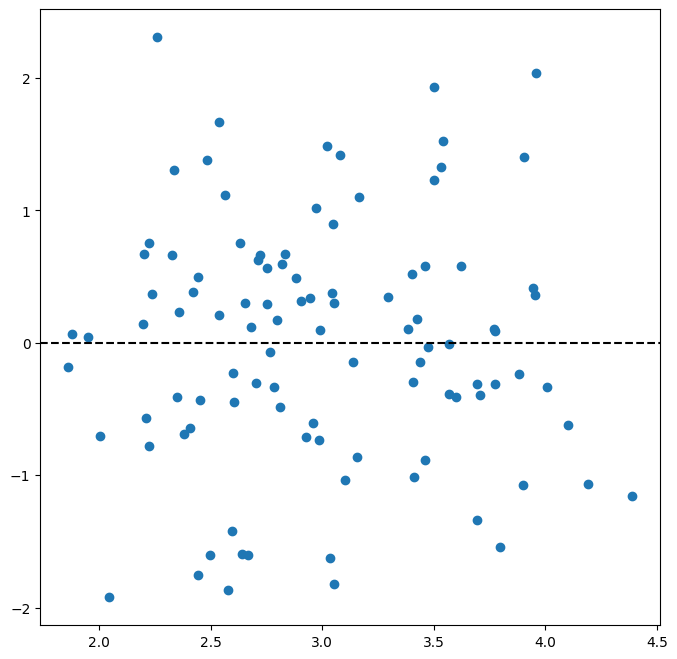

In [191]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, color = 'black', linestyle = '--')
plt.show()

In [179]:
infl = results.get_influence()

100

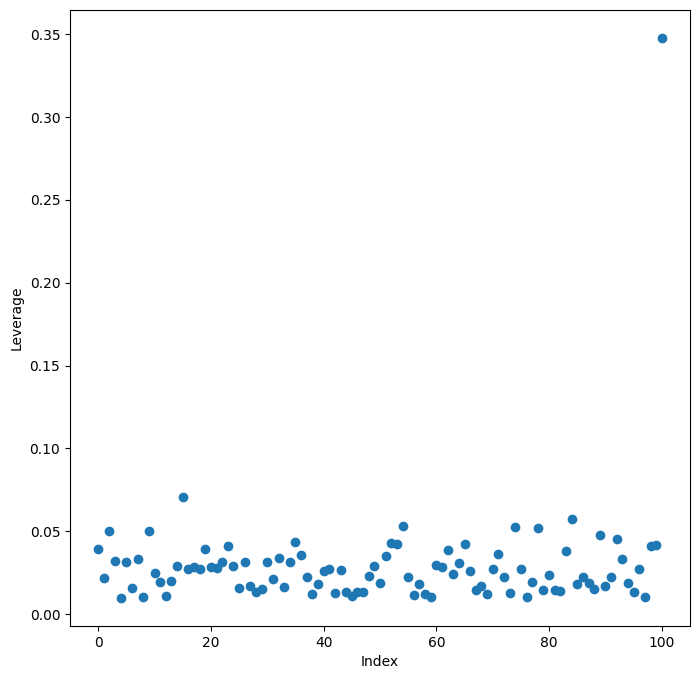

In [180]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [200]:
model = sm.OLS(y, X_df[['intercept','X1']])
results1 = model.fit()

In [201]:
summarize(results1)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
X1,1.8760,0.358,5.236,0.0


<Axes: >

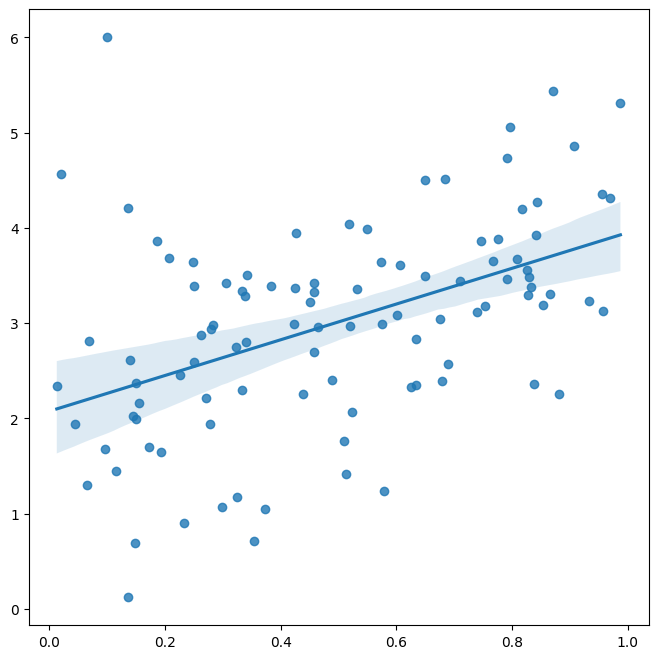

In [202]:
fig, ax = subplots(figsize = (8,8))
sns.regplot(x = x1, y = y, ax = ax)

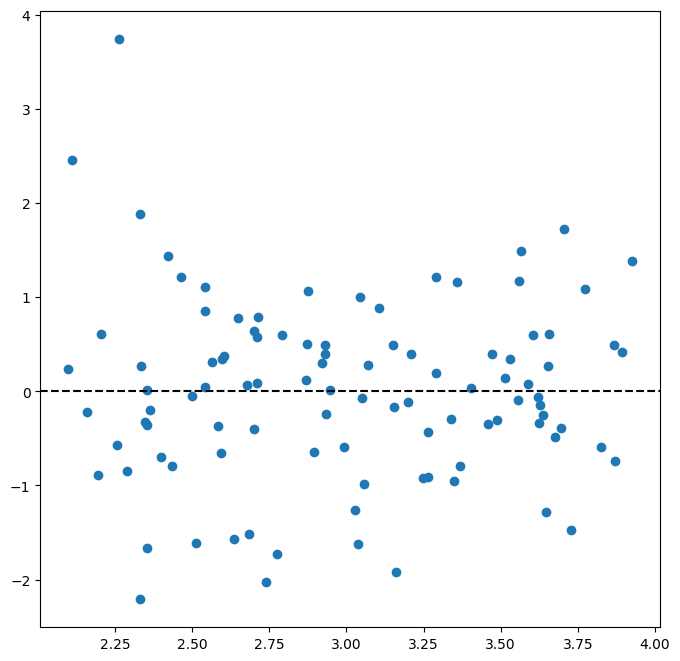

In [203]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(results1.fittedvalues, results1.resid)
ax.axhline(0, color = 'black', linestyle = '--')
plt.show()

In [204]:
infl = results1.get_influence()

52

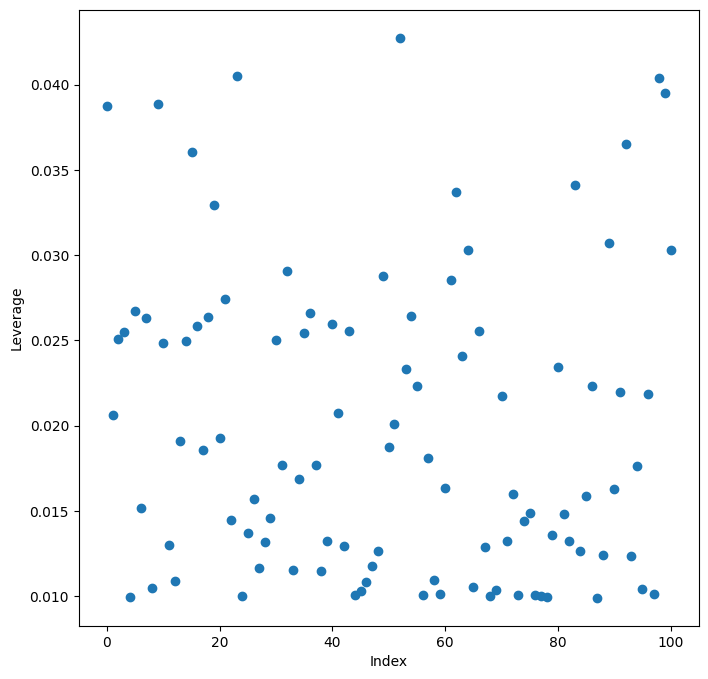

In [205]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [206]:
model = sm.OLS(y, X_df[['intercept','X2']])
results2 = model.fit()

In [207]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
X2,3.1458,0.524,6.008,0.0


<Axes: >

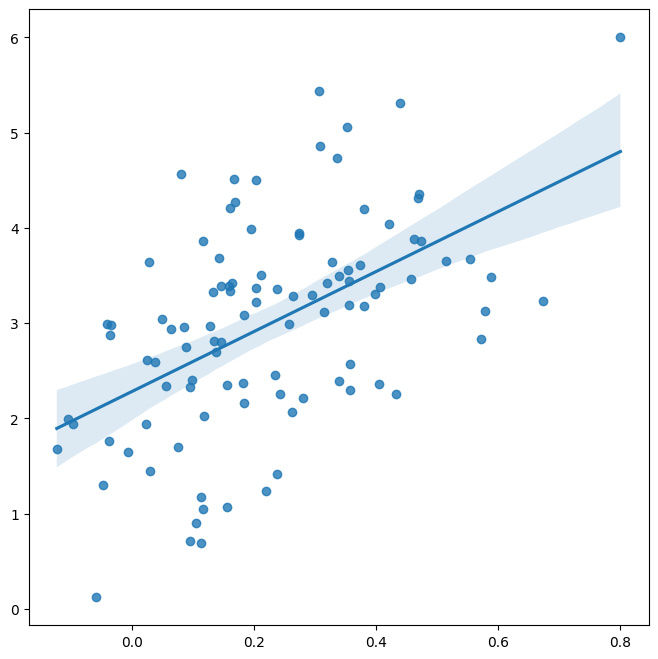

In [211]:
fig, ax = subplots(figsize = (8,8))
sns.regplot(x = x2, y = y, ax = ax)

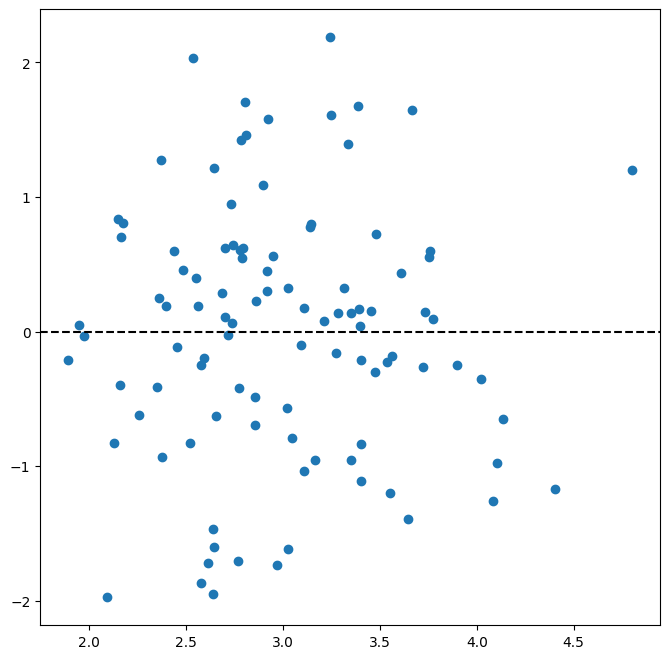

In [208]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(results2.fittedvalues, results2.resid)
ax.axhline(0, color = 'black', linestyle = '--')
plt.show()

In [209]:
infl = results2.get_influence()

100

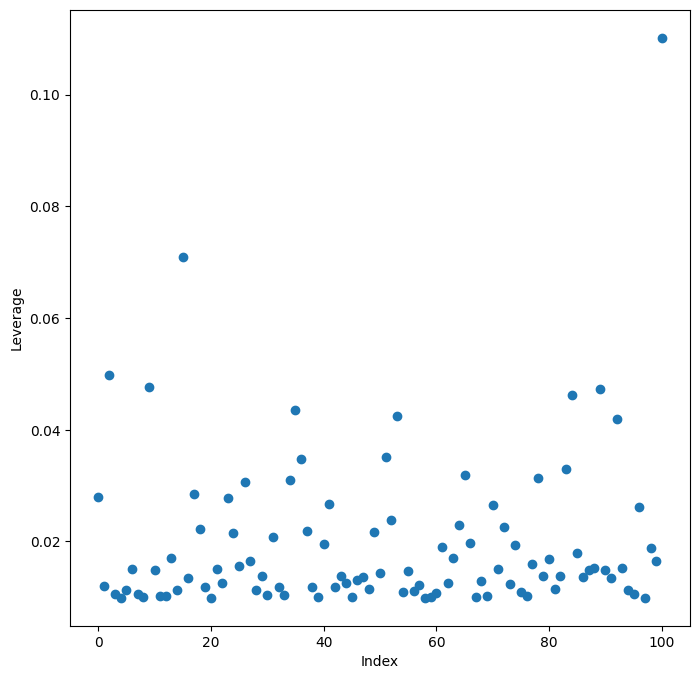

In [210]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x1.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

# Boston predict per capita crime rate

In [5]:
Boston = load_data('Boston')

In [6]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [15]:
predictors = Boston.columns.drop('crim')
y = Boston['crim']

In [19]:
for predictor in predictors:
  design = MS([f'{predictor}'])
  X = design.fit_transform(Boston)
  model = sm.OLS(y ,X)
  results = model.fit()
  print(predictor)
  display(results.summary())
  display(summarize(results))

zn


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.51e-06
Time:                        08:47:08   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


indus


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.45e-21
Time:                        08:47:08   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


chas


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Mon, 23 Sep 2024   Prob (F-statistic):              0.209
Time:                        08:47:08   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7444      0.396      9.453      0.000       2.966       4.523
chas          -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


nox


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           3.75e-23
Time:                        08:47:08   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.7199      1.699     -8.073      0.000     -17.059     -10.381
nox           31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-13.7199,1.699,-8.073,0.0
nox,31.2485,2.999,10.419,0.0


rm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           6.35e-07
Time:                        08:47:08   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.4818      3.364      6.088      0.000      13.872      27.092
rm            -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,20.4818,3.364,6.088,0.0
rm,-2.6841,0.532,-5.045,0.0


age


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.85e-16
Time:                        08:47:08   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7779      0.944     -4.002      0.000      -5.633      -1.923
age            0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


dis


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           8.52e-19
Time:                        08:47:08   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.4993      0.730     13.006      0.000       8.064      10.934
dis           -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,9.4993,0.730,13.006,0.0
dis,-1.5509,0.168,-9.213,0.0


rad


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.69e-56
Time:                        08:47:09   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.2872      0.443     -5.157      0.000      -3.158      -1.416
rad            0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-2.2872,0.443,-5.157,0.0
rad,0.6179,0.034,17.998,0.0


tax


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.36e-47
Time:                        08:47:09   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.5284      0.816    -10.454      0.000     -10.131      -6.926
tax            0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,coef,std err,t,P>|t|
intercept,-8.5284,0.816,-10.454,0.0
tax,0.0297,0.002,16.099,0.0


ptratio


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.94e-11
Time:                        08:47:09   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -17.6469      3.147     -5.607      0.000     -23.830     -11.464
ptratio        1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-17.6469,3.147,-5.607,0.0
ptratio,1.1520,0.169,6.801,0.0


lstat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.65e-27
Time:                        08:47:09   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.3305      0.694     -4.801      0.000      -4.694      -1.968
lstat          0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,-3.3305,0.694,-4.801,0.0
lstat,0.5488,0.048,11.491,0.0


medv


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.17e-19
Time:                        08:47:09   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7965      0.934     12.628      0.000       9.961      13.632
medv          -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,coef,std err,t,P>|t|
intercept,11.7965,0.934,12.628,0.0
medv,-0.3632,0.038,-9.460,0.0


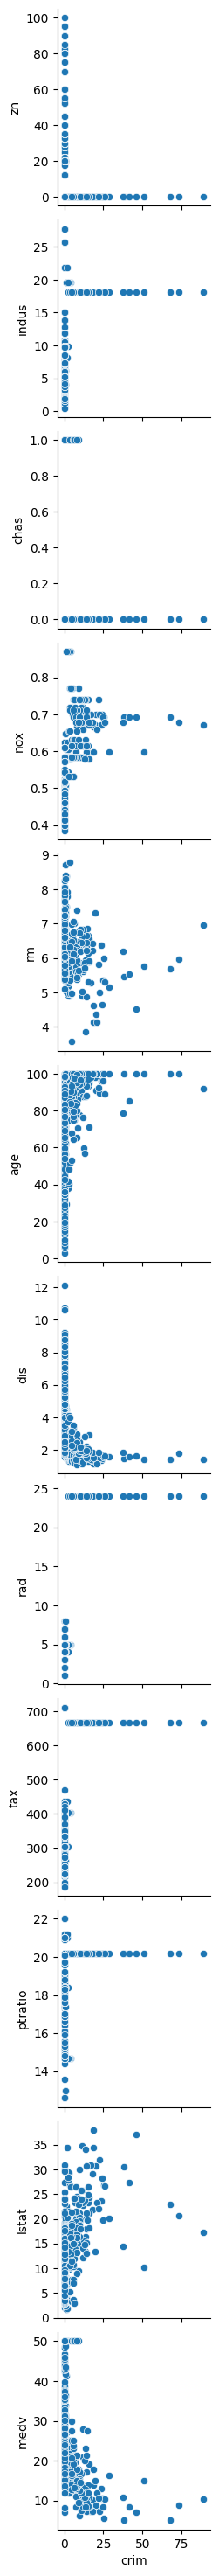

In [20]:
sns.pairplot(Boston, x_vars='crim', y_vars=Boston.columns.drop('crim'))
plt.show()

In [40]:
design = MS(predictors)
X = design.fit_transform(Boston)
model = sm.OLS(y ,X)
results = model.fit()
print(predictor)
display(results.summary())
display(summarize(results))

medv


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.03e-56
Time:                        09:20:07   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


After runnig a multiple linear regression we see that only a couple of predictors help for the predictio of crime such as medv, rad, dis, zn.

In [41]:
y_params = results.params

In [39]:
x_params = []
for predictor in predictors:
  design = MS([f'{predictor}'])
  X = design.fit_transform(Boston)
  model = sm.OLS(y ,X)
  results = model.fit()
  x_params.append(results.params.loc[f'{predictor}'])

In [46]:
x_params

[-0.07393497740412348,
 0.5097763311042313,
 -1.8927765508037608,
 31.248531201122923,
 -2.684051224113948,
 0.10778622713953308,
 -1.5509016824100994,
 0.6179109273272014,
 0.029742252822765353,
 1.1519827870705868,
 0.5488047820623981,
 -0.363159922257603]

In [44]:
y_params = y_params[1:]

In [45]:
y_params

,0
zn,0.045710
indus,-0.058350
chas,-0.825378
nox,-9.957587
rm,0.628911
age,-0.000848
dis,-1.012247
rad,0.612465
tax,-0.003776
ptratio,-0.304073


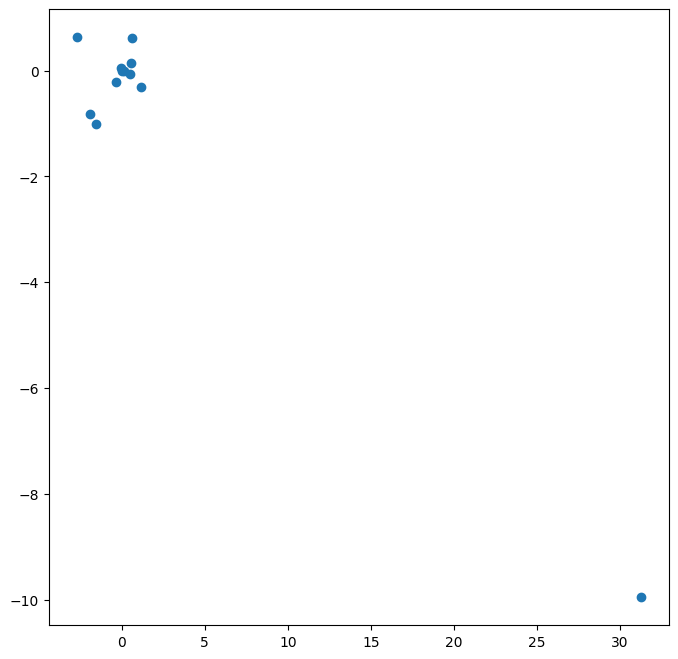

In [49]:
fix, ax = subplots(figsize = (8,8))
ax.scatter(x = x_params, y = y_params)
plt.show()